# Data Visualization and Feature Engineering 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *

titanic = pd.read_csv('/Datasets/Titanic/train.csv')
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


**Features, Data Types and Missing Values**

In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Cast "Survived" as factor and rename**

In [3]:
titanic['Survived'] = pd.Categorical(titanic.Survived)
print(titanic['Survived'].unique())

[0, 1]
Categories (2, int64): [0, 1]


In [4]:
titanic['Survived'] = titanic['Survived'].cat.rename_categories(['Dead','Survived'])
print(titanic['Survived'].unique())

['Dead', 'Survived']
Categories (2, object): ['Dead', 'Survived']


**Fill missing values and rename "Embarked"**

In [5]:
titanic['Embarked'] = pd.Categorical(titanic.Embarked)
print(titanic['Embarked'].unique())

['S', 'C', 'Q', NaN]
Categories (3, object): ['S', 'C', 'Q']


In [6]:
titanic['Embarked'] = titanic['Embarked'].cat.add_categories('Unknown')
titanic['Embarked'] = titanic.Embarked.fillna('Unknown')
titanic['Embarked'] = titanic['Embarked'].cat.rename_categories(['Southampton', 'Cherbourg', 'Queenstown', 'Unknown'])
print(titanic['Embarked'].unique())

['Queenstown', 'Southampton', 'Cherbourg', 'Unknown']
Categories (4, object): ['Queenstown', 'Southampton', 'Cherbourg', 'Unknown']


**What's the distribution of "Survived"?**

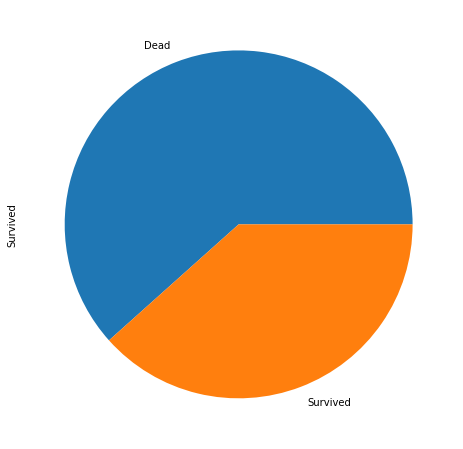

In [7]:
plt.figure(figsize=(8,8))
titanic['Survived'].value_counts().plot(kind='pie')
plt.show()

**Does gender play an important role?**

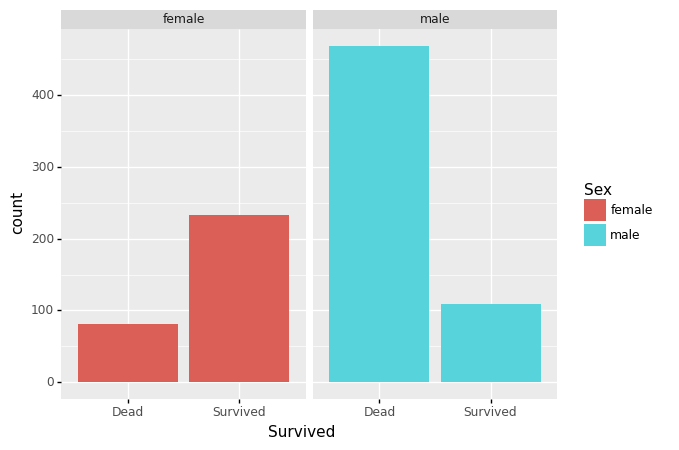

<ggplot: (155292483268)>


In [8]:
sex_survived_plt = (ggplot(titanic, aes(x='Survived', fill='Sex')))
sex_survived_plt = sex_survived_plt + geom_bar() + facet_wrap('~Sex')
print(sex_survived_plt)

**Does embarking port play an important role?**

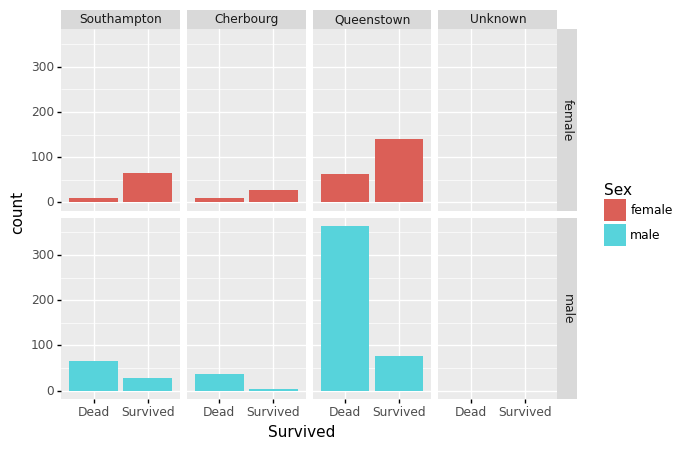

<ggplot: (155292585135)>


In [9]:
sex_survived_plt = sex_survived_plt + geom_bar() + facet_grid('Sex ~ Embarked')
print(sex_survived_plt)

**Does age play an important role?**

C:\Users\Paula\anaconda3\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_density : Removed 177 rows containing non-finite values.


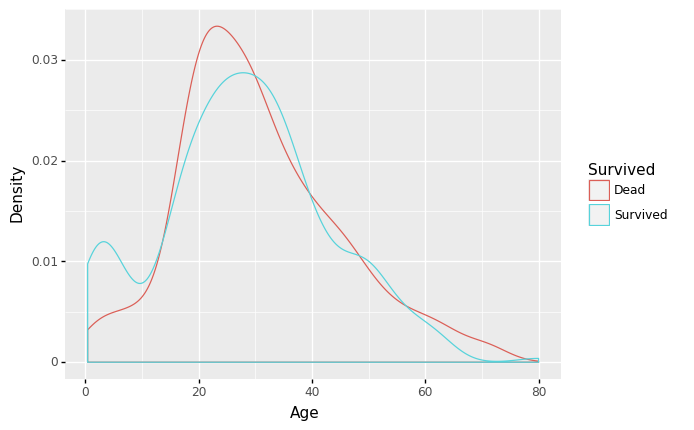

<ggplot: (155293031659)>


In [10]:
age_survived_plt = (ggplot(titanic, aes(x='Age', color='Survived')))
age_survived_plt1 = age_survived_plt + geom_density() + ylab("Density")
print(age_survived_plt1)

**Multi-dimension visulization: Age, Gender and Embarking Port**

C:\Users\Paula\anaconda3\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_boxplot : Removed 177 rows containing non-finite values.


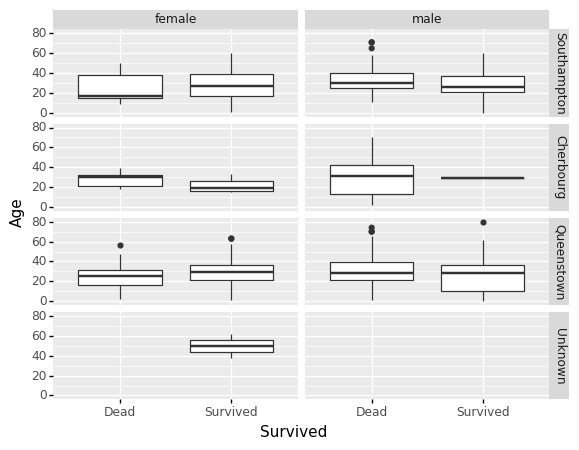

<ggplot: (155292955344)>


In [11]:
survived_age_plt = (ggplot(titanic, aes(x='Survived', y='Age')))
survived_age_plt1 = survived_age_plt + geom_boxplot() + facet_grid('Embarked ~ Sex')
print(survived_age_plt1)